#LAB 1- Adversarial (noise) attacks


##1. Working with a Pretrained Network

In [ ]:
!pip install -q tensorflow

In [2]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')

# 2) Print model architecture summary
print("=== ResNet50 model.summary() ===")
model.summary()

img_path = 'elephant.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(preprocess_input(np.copy(x)))   # preds computed on preprocessed copy

print("\nTop-3 predictions:")
for i, (imagenet_id, label, prob) in enumerate(decode_predictions(preds, top=3)[0], start=1):
    print(f"{i}. {label}: {prob*100:.2f}%")

# 4) Visualize the image and predictions
plt.figure(figsize=(5,5))
plt.imshow((image.img_to_array(img).astype('uint8')))
plt.axis('off')
plt.title('\n'.join([f"{i}. {label}: {prob*100:.2f}%" for i,( _ ,label,prob) in enumerate(decode_predictions(preds, top=3)[0], start=1)]))
plt.show()





102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
=== ResNet50 model.summary() ===


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

FileNotFoundError: [Errno 2] No such file or directory: 'elephant.jpg'

In [ ]:
len(ResNet50(weights='imagenet').layers)


177

##Creating Noise (Adversarial) Attacks

In [ ]:
!pip install foolbox
import tensorflow as tf
from foolbox import TensorFlowModel
from foolbox.attacks import LinfFastGradientAttack


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.1 MB/s eta 0:00:00


Wrapping my Keras model for Foolbox:Fast Gradient Sign Method (FGSM)

In [ ]:
pre = dict(flip_axis=-1, mean=[103.939, 116.779, 123.68])
fmodel = TensorFlowModel(model, bounds=(0, 255), preprocessing=pre)
attack = LinfFastGradientAttack()


Defining input and apply ing attacks with gradually increasing ε (epsilon) values — which control how much noise is added

In [ ]:
# choose 5 pixel-intensity epsilons (L-inf steps in pixel units)
epsilons = [1.0, 2.0, 4.0, 8.0, 16.0]

# since these are already pixel units, use them as-is
eps_pixels = [float(e) for e in epsilons]

import tensorflow as tf
x_tf = tf.convert_to_tensor(x)                   # x must be raw 0..255
true_label_tf = tf.convert_to_tensor(true_label)

raw_advs, clipped_advs, success = attack(fmodel, x_tf, true_label_tf, epsilons=eps_pixels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


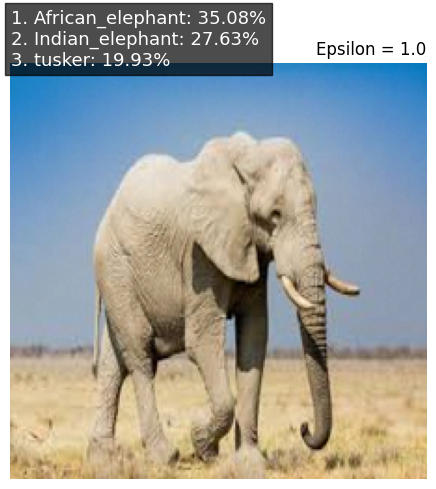

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


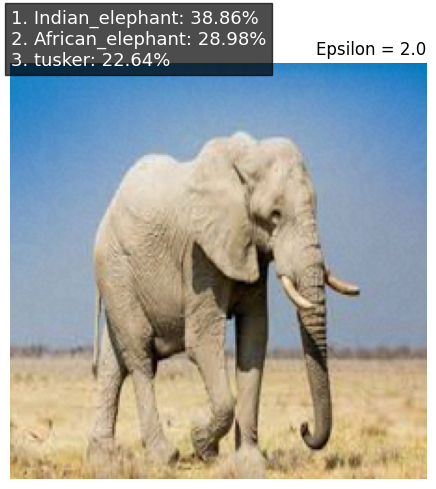

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


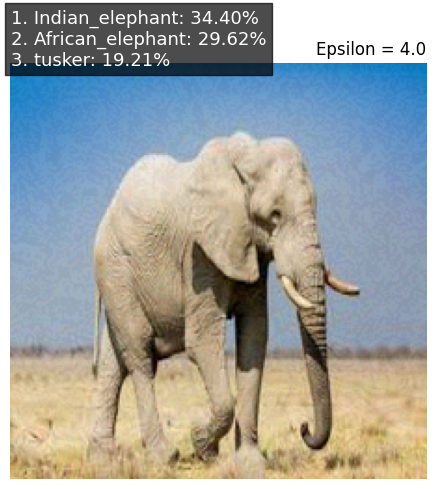

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


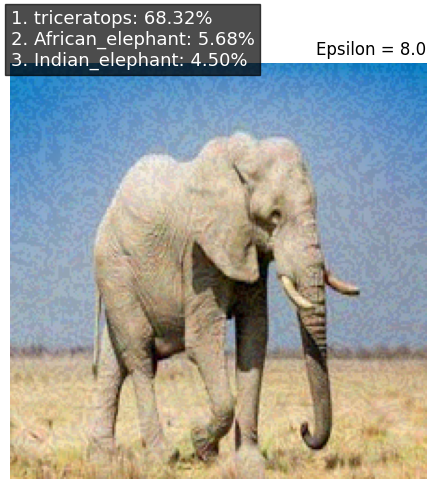

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


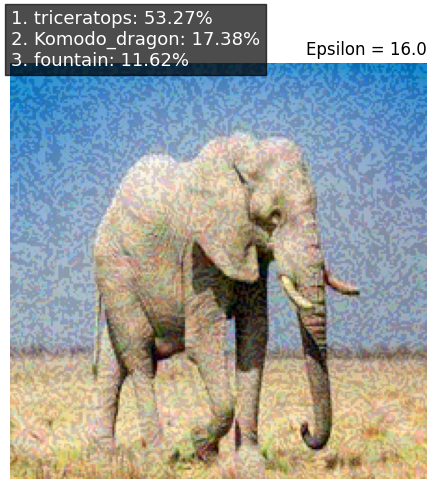

In [ ]:
for i, (sample, epsilon) in enumerate(zip(raw_advs, epsilons)):
    preds = model.predict(sample)
    predictions = decode_predictions(preds, top=3)[0]
    plt.figure(figsize=(7, 5))
    plt.imshow(sample[0] / 255)
    plt.title(f"Epsilon = {epsilon}", fontsize=12, loc='right')
    plt.axis('off')
    plt.text(0.02, 0.82, "\n".join(f"{i+1}. {p[1]}: {p[2]*100:.2f}%" for i, p in enumerate(predictions)), fontsize=13, color='white', bbox=dict(facecolor='black', alpha=0.7))
    plt.tight_layout()
    plt.show()

#LAB 2 ;DAta Augmentation - Dogs VS Cats Classification  (Аугментация данных)

In [ ]:
!pip install -q gdown

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import drive

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

print("✓ Libraries imported successfully")
print(f"TensorFlow version: {tf.__version__}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Libraries imported successfully
TensorFlow version: 2.19.0


DATA LOADING FUNCTION

In [6]:
def download_data(path):
    """
    Load images from the specified directory.

    WHY THIS APPROACH:
    - We resize all images to 180x180 for consistent input shape
    - We convert images to numpy arrays for efficient processing
    - We create binary labels: 0 for cats, 1 for dogs
    - Using sorted() ensures consistent ordering across runs

    Args:
        path: Directory path containing images

    Returns:
        data: numpy array of images (N, 180, 180, 3)
        labels: numpy array of labels (N,)
    """
    data = []
    labels = []

    for path_image in sorted(os.listdir(path=path)):
       # Open and resize image to 180x180 pixels
        # WHY 180x180: Good balance between detail preservation and memory usage
        image = Image.open(path + path_image).resize((180, 180))

        # Convert to numpy array
        image = np.array(image)

        # Append image data as uint8 (0-255 range)
        data.append(image.astype(np.uint8))

        # Create binary labels based on filename
        # 'cat' in filename → label 0
        # 'dog' in filename → label 1
        if 'cat' in path_image:
            labels.append(0)
        else:
            labels.append(1)

    return np.array(data), np.array(labels)

LOAD THE DATASET

In [7]:
"""DOWNLOAD STRATEGY:
We'll download the datasets directly from Google Drive using gdown library.
Then extract them to create the proper folder structure.

APPROACH:
1. Install gdown (Google Drive downloader)
2. Download Train.zip and Test.zip from shared links
3. Extract to Google Drive for persistence
4. Verify the structure
"""

# Install gdown for downloading from Google Drive
!pip install -q gdown

import zipfile

print("="*70)
print("DOWNLOADING DATASETS FROM GOOGLE DRIVE")
print("="*70)

# Create directory structure
dataset_path = "./drive/My Drive/Dogs-Cats/"
os.makedirs(dataset_path, exist_ok=True)

# Google Drive file IDs extracted from your links
TRAIN_FILE_ID = "19USiiHW2Am5lwOGNtRkP3ZSq9-szeI6D"
TEST_FILE_ID = "14VALvKS-S9OC8wCbcWXPdrLXC8eatnI_"

# Download Train.zip
print("\n[1/4] Downloading Train.zip...")
train_zip_path = dataset_path + "Train.zip"
!gdown --id {TRAIN_FILE_ID} -O "{train_zip_path}"
print("✓ Train.zip downloaded")

# Download Test.zip
print("\n[2/4] Downloading Test.zip...")
test_zip_path = dataset_path + "Test.zip"
!gdown --id {TEST_FILE_ID} -O "{test_zip_path}"
print("✓ Test.zip downloaded")

# Extract Train.zip
print("\n[3/4] Extracting Train.zip...")
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)
print("✓ Train data extracted")

# Extract Test.zip
print("\n[4/4] Extracting Test.zip...")
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)
print("✓ Test data extracted")

# Verify the structure
print("\n" + "="*70)
print("VERIFYING DATASET STRUCTURE")
print("="*70)

train_path = dataset_path + "Train/"
test_path = dataset_path + "Test/"

if os.path.exists(train_path):
    train_files = os.listdir(train_path)
    print(f"✓ Train directory exists: {len(train_files)} files")
    print(f"  First 5 files: {train_files[:5]}")
else:
    print("❌ Train directory not found!")

if os.path.exists(test_path):
    test_files = os.listdir(test_path)
    print(f"✓ Test directory exists: {len(test_files)} files")
    print(f"  First 5 files: {test_files[:5]}")
else:
    print("❌ Test directory not found!")

# Optional: Clean up zip files to save space
print("\n[Optional] Cleaning up zip files to save space...")
try:
    os.remove(train_zip_path)
    os.remove(test_zip_path)
    print("✓ Zip files removed")
except:
    print("⚠ Could not remove zip files (may not exist)")

DOWNLOADING DATASETS FROM GOOGLE DRIVE

[1/4] Downloading Train.zip...
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19USiiHW2Am5lwOGNtRkP3ZSq9-szeI6D
From (redirected): https://drive.google.com/uc?id=19USiiHW2Am5lwOGNtRkP3ZSq9-szeI6D&confirm=t&uuid=557e4c76-b18f-4a5e-bb11-63c61587fdff
To: /content/drive/My Drive/Dogs-Cats/Train.zip
100% 55.2M/55.2M [00:00<00:00, 72.4MB/s]
✓ Train.zip downloaded

[2/4] Downloading Test.zip...
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=14VALvKS-S9OC8wCbcWXPdrLXC8eatnI_
From (redirect

In [7]:
import os
from PIL import Image
# ============================================================================
# STEP 4: LOAD THE DATASET INTO MEMORY
# ============================================================================

"""
Now we load the extracted images into numpy arrays for training.
This may take 1-2 minutes depending on your connection.
"""
dataset_path = "./drive/My Drive/Dogs-Cats/"
os.makedirs(dataset_path, exist_ok=True)

train_path = dataset_path + "Train/"
test_path = dataset_path + "Test/"

print("\n" + "="*70)
print("LOADING IMAGES INTO MEMORY")
print("="*70)

print("\n[1/2] Loading training data...")
train_dataset, y_train = download_data(train_path)
print(f"✓ Training data loaded: {len(train_dataset)} images")

print("\n[2/2] Loading test data...")
test_dataset, y_test = download_data(test_path)
print(f"✓ Test data loaded: {len(test_dataset)} images")

# Display dataset information
print("\n" + "="*70)
print("DATASET SUMMARY")
print("="*70)
print(f"Training set shape:   {train_dataset.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape:        {test_dataset.shape}")
print(f"Test labels shape:     {y_test.shape}")

# Count classes
train_cats = np.sum(y_train == 0)
train_dogs = np.sum(y_train == 1)
test_cats = np.sum(y_test == 0)
test_dogs = np.sum(y_test == 1)

print(f"\nClass Distribution:")
print(f"  Training: {train_cats} cats, {train_dogs} dogs")
print(f"  Testing:  {test_cats} cats, {test_dogs} dogs")
print(f"\n✓ Dataset loaded and ready for training!")


LOADING IMAGES INTO MEMORY

[1/2] Loading training data...


UnidentifiedImageError: cannot identify image file './drive/My Drive/Dogs-Cats/Train/cat.214.jpg'

In [ ]:
 #============================================================================
# STEP 4: VISUALIZE SAMPLE IMAGES
# ============================================================================

"""
WHY VISUALIZE:
- Verify data loaded correctly
- Check image quality
- Confirm labels are correct
"""
# Find indices of cats and dogs
cat_indices = np.where(y_train == 0)[0]  # Returns [0, 1, 2, ..., 1199]
dog_indices = np.where(y_train == 1)[0]  # Returns [1200, 1201, ..., 2399]

print(f"Cat images: indices {cat_indices[0]} to {cat_indices[-1]}")
print(f"Dog images: indices {dog_indices[0]} to {dog_indices[-1]}")

# Create figure with 2 rows and 4 columns
plt.figure(figsize=(12, 6))

# Top row: Display 4 cat images
print("\nDisplaying sample images...")
for idx, i in enumerate(cat_indices[:4]):
    plt.subplot(2, 4, idx + 1)  # Row 1, columns 1-4
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_dataset[i])
    plt.title(f"Cat (Label: {y_train[i]})", fontsize=10, color='blue')
    plt.xlabel(f"Index: {i}", fontsize=8)

# Bottom row: Display 4 dog images
for idx, i in enumerate(dog_indices[:4]):
    plt.subplot(2, 4, idx + 5)  # Row 2, columns 1-4
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_dataset[i])
    plt.title(f"Dog (Label: {y_train[i]})", fontsize=10, color='green')
    plt.xlabel(f"Index: {i}", fontsize=8)

plt.suptitle("Sample Images from Dataset (Label 0=Cat, Label 1=Dog)",
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

 BUILD BASELINE CNN MODEL (WITHOUT AUGMENTATION)


In [ ]:
"""
ARCHITECTURE DESIGN REASONING:

1. Rescaling Layer (1/255):
   - Normalizes pixel values from [0,255] to [0,1]
   - Helps with gradient stability during training

2. Convolutional Blocks (Conv2D + MaxPooling2D):
   - Progressive feature extraction: 32 → 64 → 128 filters
   - MaxPooling reduces spatial dimensions and computational cost
   - ReLU activation introduces non-linearity

3. Flatten Layer:
   - Converts 2D feature maps to 1D vector for dense layers

4. Dense Layers:
   - 128 units with ReLU: learns complex feature combinations
   - 1 unit with Sigmoid: outputs probability for binary classification

WHY THIS STRUCTURE:
- Standard CNN architecture proven effective for image classification
- Gradual increase in filters captures hierarchical features
- Dropout omitted in baseline to see overfitting clearly
"""
def create_baseline_model():
  model = keras.Sequential([
      layers.Rescaling(1./255, input_shape=(180, 180, 3)),

      #First Conv Block
      layers.Conv2D(32,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      #Second Conv Block
      layers.Conv2D(64,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      #third Conv Block
      layers.Conv2D(128,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      #Flattening and Dense layers
      layers.Flatten(),
      layers.Dense(128,activation='relu'),

      #Output layer (binary classification)
      layers.Dense(1,activation='sigmoid')
  ])
  return model

baseline_model = create_baseline_model()
"""
COMPILATION PARAMETERS:

- Loss: binary_crossentropy
  WHY: Standard loss for binary classification with sigmoid output

- Optimizer: RMSprop
  WHY: Adaptive learning rate optimizer, works well for CNNs

- Metrics: accuracy
  WHY: Intuitive metric for balanced classification tasks
"""
baseline_model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
  )
# Display model architecture
print("\n" + "="*70)
print("BASELINE MODEL ARCHITECTURE")
print("="*70)
baseline_model.summary()

 SHUFFLE TRAINING DATA


In [ ]:
"""
WHY SHUFFLE:
- Prevents the model from learning order-dependent patterns
- Ensures each batch has mixed samples
- Improves generalization
- Important because data might be sorted by class
"""
print("Shuffling training data...")
indices = np.array(list(range(len(train_dataset))))
np.random.shuffle(indices)
train_dataset, y_train = train_dataset[indices], y_train[indices]
print("✓ Data shuffled")

TRAIN BASELINE MODEL

In [ ]:
history_baseline = baseline_model.fit(
    train_dataset,
    y_train,
    epochs= 30,
    batch_size=32,
    validation_split=0.2,
    verbose= 1
)
print("\n✓ Baseline model training complete!")

 EVALUATE BASELINE MODEL

In [ ]:
test_loss_baseline, test_accuracy_baseline = baseline_model.evaluate(
    test_dataset,
    y_test,
    verbose=1
)
print(f"\nBaseline Model Results:")
print(f"Test Loss;{test_loss_baseline:.4f}")
print(f"Test Accuracy: {test_accuracy_baseline:.4f} ({test_accuracy_baseline*100:.2f}%))")

In [ ]:
"""
WHY THESE PLOTS:
- Show training vs validation metrics over time
- Help identify overfitting (gap between training and validation)
- Guide decisions about augmentation and regularization
"""

def plot_training_history(history, title_prefix=""):
    """Plot accuracy and loss curves"""

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy plot
    ax1.plot(epochs, accuracy, "bo-", label="Training Accuracy", markersize=4)
    ax1.plot(epochs, val_accuracy, color="tan", marker="o",
             label="Validation Accuracy", markersize=4)
    ax1.set_title(f"{title_prefix}Accuracy on Training and Validation")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Loss plot
    ax2.plot(epochs, loss, "bo-", label="Training Loss", markersize=4)
    ax2.plot(epochs, val_loss, color="tan", marker="o",
             label="Validation Loss", markersize=4)
    ax2.set_title(f"{title_prefix}Loss on Training and Validation")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot baseline results
plot_training_history(history_baseline, "BASELINE MODEL - ")

print("\n" + "="*70)
print("BASELINE MODEL ANALYSIS")
print("="*70)
print("""
OBSERVATIONS:
- Training accuracy likely reached 95%+ (showing the model can learn)
- Validation accuracy significantly lower (~70-75%)
- Large gap indicates OVERFITTING
- The model memorizes training data but doesn't generalize well

PROBLEM: Small dataset (2400 images) leads to overfitting

SOLUTION: Data augmentation + regularization (next steps)
""")


CREATE DATA AUGMENTATION PIPELINE

In [ ]:

"""
DATA AUGMENTATION TECHNIQUES:

1. RandomFlip("horizontal"):
   - Flips 50% of images horizontally
   - WHY: Cats/dogs look the same when flipped (preserves semantic meaning)
   - Creates mirror versions of images

2. RandomRotation(0.1):
   - Rotates images by ±10% of full circle (±36 degrees)
   - WHY: Real photos can be at various angles
   - Teaches model rotation invariance

3. RandomZoom(0.2):
   - Zooms in/out by ±20%
   - WHY: Objects appear at different scales in photos
   - Improves scale invariance

IMPACT:
- Model sees different versions of same image each epoch
- Never sees exact same image twice
- Reduces overfitting by increasing effective dataset size
- Forces model to learn robust features
"""

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

print("\n" + "="*70)
print("DATA AUGMENTATION PIPELINE CREATED")
print("="*70)
print("Augmentation layers:")
print("1. RandomFlip (horizontal)")
print("2. RandomRotation (±36 degrees)")
print("3. RandomZoom (±20%)")



 VISUALIZE AUGMENTED IMAGES



WHY VISUALIZE AUGMENTATIONS:
- Verify augmentations look realistic
- Ensure transformations preserve image semantics
- Check that augmentations aren't too extreme



In [ ]:
plt.figure(figsize=(10,10))
# Take one image and create 9 augmented versions
sample_image=train_dataset[7]
for i in range(9):
  augmented_image =data_augmentation([sample_image])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

plt.suptitle("Data Augmentation Examples - Same Image, Different Transformations",
             fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

BUILD AUGMENTED CNN MODEL

In [ ]:
def create_augmented_model():
  model =keras.Sequential([
      data_augmentation,
      layers.Rescaling(1./255),

      #First Conv Block
      layers.Conv2D(32,(3,3),activation='relu'),
      layers.MaxPool2D(2,2),

      #Second Conv Block
      layers.Conv2D(64,(3,3),activation='relu'),
      layers.MaxPool2D(2,2),

      #Third Conv Block
      layers.Conv2D(128,(3,3),activation='relu'),
      layers.MaxPool2D(2,2),

      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.5),

      layers.Dense(1,activation='sigmoid'),
  ])
  return model

augmented_model= create_baseline_model()

augmented_model.compile(
    metrics =['accuracy'],
    optimizer= 'rmsprop',
    loss="binary_crossentropy",
)
augmented_model.summary()

In [ ]:
history_augmented=augmented_model.fit(
    train_dataset,
    y_train,
    batch_size=32,
    epochs=30,
    validation_split=0.2,
    verbose=1
)
print("\n✓ Augmented model training complete!")

EVALUATE AUGMENTED MODEL

In [ ]:
test_loss_agumented,test_accuracy_agumented = augmented_model.evaluate(
    test_dataset,
    y_test,
    verbose=1
)
print(f'Test loss:{test_loss_agumented:.4f}')
print(f'Test Accuracy :{test_accuracy_agumented:.4f}({test_accuracy_agumented*100:.2f}%)')

VISUALIZE AUGMENTED MODEL TRAINING HISTORY

In [ ]:
plot_training_history(history_augmented, "AUGMENTED MODEL - ")

In [ ]:
# STEP 16: COMPARE BOTH MODELS
# ============================================================================

print("\n" + "="*70)
print("FINAL COMPARISON: BASELINE vs AUGMENTED MODEL")
print("="*70)

comparison_data = {
    'Model': ['Baseline (No Augmentation)', 'Augmented (With Augmentation + Dropout)'],
    'Test Accuracy': [f'{test_accuracy_baseline*100:.2f}%', f'{test_accuracy_agumented*100:.2f}%'],
    'Test Loss': [f'{test_loss_baseline:.4f}', f'{test_loss_agumented:.4f}'],
    'Training Epochs': [30, 80],
    'Overfitting': ['High (large train-val gap)', 'Reduced (smaller train-val gap)']
}

print("\n{:<40} {:<15} {:<15} {:<15} {:<30}".format(
    'Model', 'Test Accuracy', 'Test Loss', 'Epochs', 'Overfitting'
))
print("="*115)
for i in range(len(comparison_data['Model'])):
    print("{:<40} {:<15} {:<15} {:<15} {:<30}".format(
        comparison_data['Model'][i],
        comparison_data['Test Accuracy'][i],
        comparison_data['Test Loss'][i],
        str(comparison_data['Training Epochs'][i]),
        comparison_data['Overfitting'][i]
    ))

# Calculate improvement
improvement = (test_accuracy_agumented - test_accuracy_baseline) * 100
print(f"\n📊 Accuracy Improvement: {improvement:+.2f} percentage points")

In [ ]:
# ============================================================================
# STEP 17: VISUALIZE COMPARISON
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Baseline Accuracy
ax1 = axes[0, 0]
ax1.plot(history_baseline.history['accuracy'], label='Train', linewidth=2)
ax1.plot(history_baseline.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Baseline Model - Accuracy', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Baseline Loss
ax2 = axes[0, 1]
ax2.plot(history_baseline.history['loss'], label='Train', linewidth=2)
ax2.plot(history_baseline.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Baseline Model - Loss', fontsize=12, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Augmented Accuracy
ax3 = axes[1, 0]
ax3.plot(history_augmented.history['accuracy'], label='Train', linewidth=2)
ax3.plot(history_augmented.history['val_accuracy'], label='Validation', linewidth=2)
ax3.set_title('Augmented Model - Accuracy', fontsize=12, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Augmented Loss
ax4 = axes[1, 1]
ax4.plot(history_augmented.history['loss'], label='Train', linewidth=2)
ax4.plot(history_augmented.history['val_loss'], label='Validation', linewidth=2)
ax4.set_title('Augmented Model - Loss', fontsize=12, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
